<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/Gorev14_Mert_G%C3%BCney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR 10 veri seti ile CNN modeli geliştirip yorumlayın.(Dropout olan ve olmayan olarak iki farklı şekilde deneyin.)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


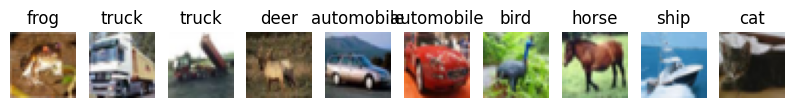

In [3]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [5]:
def build_cnn_model(dropout=False):
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    if dropout:
        model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    if dropout:
        model.add(Dropout(0.25))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    if dropout:
        model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    if dropout:
        model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [6]:
# Dropout'suz model
model_no_dropout = build_cnn_model(dropout=False)
model_no_dropout.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_no_dropout = model_no_dropout.fit(
    x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test)
)

# Dropout'lu model
model_with_dropout = build_cnn_model(dropout=True)
model_with_dropout.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(
    x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4679 - loss: 1.5463 - val_accuracy: 0.6331 - val_loss: 1.0554
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6908 - loss: 0.8843 - val_accuracy: 0.6443 - val_loss: 1.0446
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7623 - loss: 0.6749 - val_accuracy: 0.7029 - val_loss: 0.8445
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8119 - loss: 0.5397 - val_accuracy: 0.6803 - val_loss: 0.9583
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8534 - loss: 0.4196 - val_accuracy: 0.7132 - val_loss: 0.8713
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8843 - loss: 0.3270 - val_accuracy: 0.7063 - val_loss: 0.9625
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9103 - loss: 0.2596 - val_accuracy: 0.6911 - val_loss: 1.1676
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9281 - loss: 0.2064 - val_accuracy: 

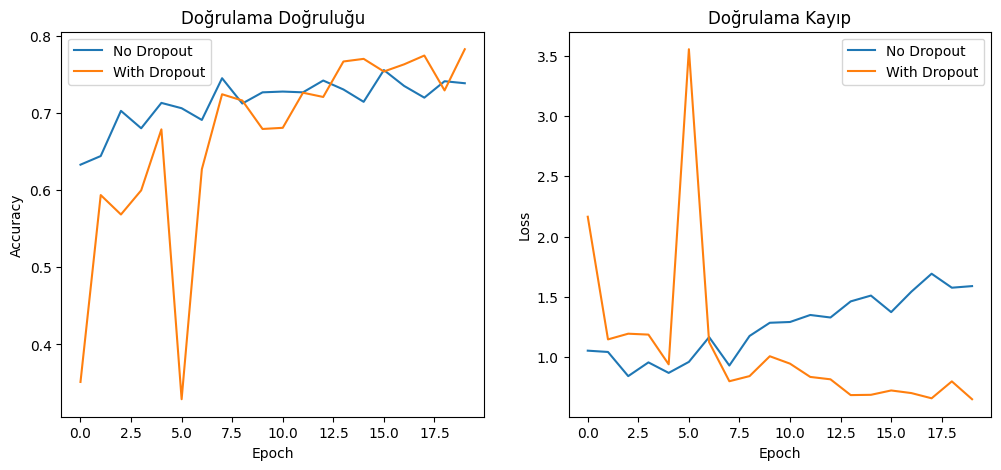

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.title('Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no_dropout.history['val_loss'], label='No Dropout')
plt.plot(history_with_dropout.history['val_loss'], label='With Dropout')
plt.title('Doğrulama Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


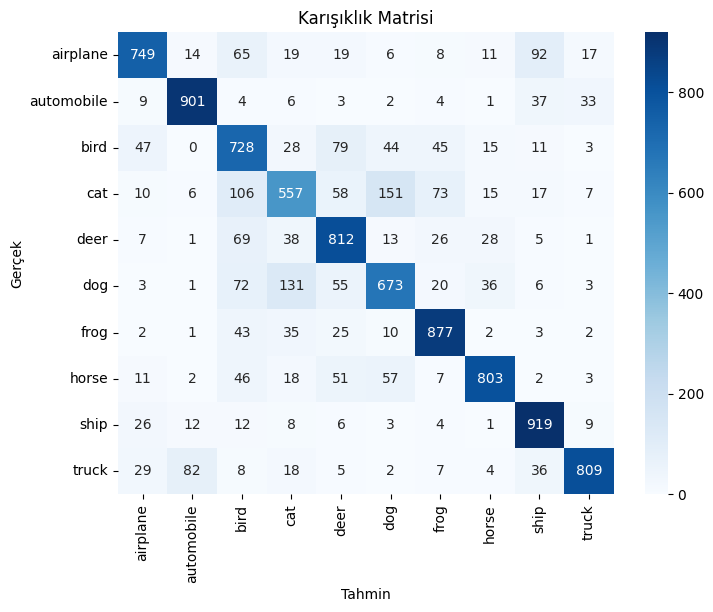

              precision    recall  f1-score   support

    airplane       0.84      0.75      0.79      1000
  automobile       0.88      0.90      0.89      1000
        bird       0.63      0.73      0.68      1000
         cat       0.65      0.56      0.60      1000
        deer       0.73      0.81      0.77      1000
         dog       0.70      0.67      0.69      1000
        frog       0.82      0.88      0.85      1000
       horse       0.88      0.80      0.84      1000
        ship       0.81      0.92      0.86      1000
       truck       0.91      0.81      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



In [8]:
# Dropout'lu modelin tahminleri
y_pred = model_with_dropout.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Dropout'lu model ile eğitim
model_aug = build_cnn_model(dropout=True)
model_aug.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_aug = model_aug.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.2499 - loss: 2.1285 - val_accuracy: 0.4577 - val_loss: 1.4560
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.3940 - loss: 1.6482 - val_accuracy: 0.5290 - val_loss: 1.3055
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4640 - loss: 1.4858 - val_accuracy: 0.5605 - val_loss: 1.3082
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5058 - loss: 1.3804 - val_accuracy: 0.6266 - val_loss: 1.0583
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.5380 - loss: 1.3071 - val_accuracy: 0.6078 - val_loss: 1.1177
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5621 - loss: 1.2415 - val_accuracy: 0.6436 - val_loss: 1.0573
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5855 - loss: 1.1789 - val_accuracy: 0.5761 - val_loss: 1.1965
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6004 - loss: 1.1482 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


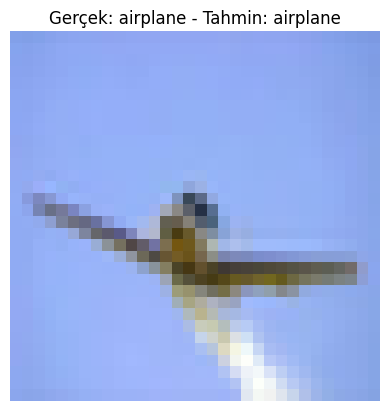

In [10]:
# Test setinden rastgele bir görsel seçip tahmin et
idx = np.random.randint(0, x_test.shape[0])
img = x_test[idx]
true_label = class_names[np.argmax(y_test[idx])]
pred_label = class_names[np.argmax(model_with_dropout.predict(img[np.newaxis, ...]))]

plt.imshow(img)
plt.title(f'Gerçek: {true_label} - Tahmin: {pred_label}')
plt.axis('off')
plt.show()

In [11]:
model_with_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,072,224 (4.09 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 714,518 (2.73 MB)